## Importing Libraries

We basic libraries and modules for our simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv_low_reward as SQLenv
import agent2 as agn

## Setting up the model

We set up our environment.

In [2]:
env = SQLenv.mockSQLenv(verbose=True)

Game setup with a random query


We instantiate an agent and look at its starting Q-table.

In [3]:
agt = agn.Agent(const.actions)
agt.set_learning_options(exploration=0.02, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)
print(agt.Q)
print(agt.total_successes, "/", agt.total_trials)

{(): array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}
0 / 0


## Running the model

We run an agent on our environment.

In [4]:
agt.reset(env)
agt.run_episode()

Game reset (but not reinitialized with a new random query!)
Game reset
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1

Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received 

Query with correct number of rows
Server response is 4
I received action 26: ' union select 1,2,3,4 limit 1 offset 1#
Query with correct number of rows
Server response is 4
I received action 27: ' union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received act

True

We then take a look at some statistics of the agent: its Q-table, the number of its entries, the number of steps taken, and the amount of reward.

In [5]:
agt.Q

{(): array([0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 (-1,): array([0.89, 0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 (-2,
  -1): array([0.89, 0.89, 0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1. 

In [6]:
print(ut.getdictshape(agt.Q))

(41, (51,))


In [7]:
print(agt.steps)

611


In [8]:
print(agt.rewards)

-600


## Training the agent

We train the agent over $10^6$ episodes.

In [9]:
nepisodes = 10**6

agt = agn.Agent(const.actions,verbose=False)
agt.set_learning_options(exploration=0.02, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)

steps = []; rewards = []; states = []
for _ in tqdm(range(nepisodes)):
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    steps.append(agt.steps)
    rewards.append(agt.rewards)
    states.append(ut.getdictshape(agt.Q)[0])    

100%|██████████| 1000000/1000000 [23:29<00:00, 709.66it/s]


We save its Q-matrix.

In [10]:
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
joblib.dump(agt.Q,'ignore_simul1_'+timestamp+'.pkl')

['ignore_simul1_20201211173244631606.pkl']

## Analyzing the agent

We plot the variation in the number of states in the Q-matrix

Text(0, 0.5, 'number of states')

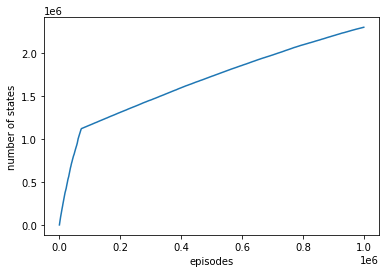

In [15]:
plt.plot(states)
plt.xlabel('episodes')
plt.ylabel('number of states')

We plot the number of steps per episode (averaged over 100 consecutive episodes and smoothing)

Text(0, 0.5, 'number of steps')

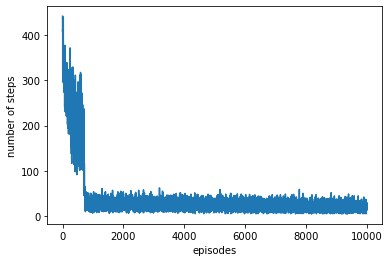

In [16]:
plt.plot(np.mean(np.array(steps).reshape(-1,100),axis=1))
plt.xlabel('episodes')
plt.ylabel('number of steps')

Text(0, 0.5, 'number of steps')

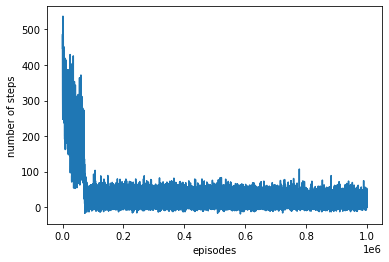

In [17]:
plt.plot(SGfilter(steps,101,3))
plt.xlabel('episodes')
plt.ylabel('number of steps')

We plot the amount of reward per episode (averaged over 100 consecutive episodes)

Text(0, 0.5, 'reward')

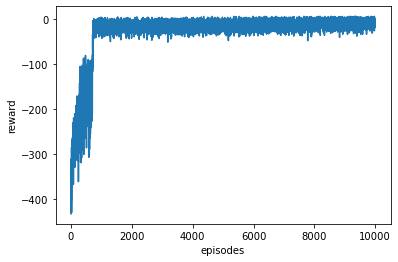

In [18]:
plt.plot(np.mean(np.array(rewards).reshape(-1,100),axis=1))
plt.xlabel('episodes')
plt.ylabel('reward')

We now further run the agent in a test setting for further $100$ epiodes, by making its policy deterministic and setting the exploration parameter $\epsilon$ to 0.

In [19]:
nepisodes = 100

agt.set_learning_options(exploration=0.0)

Tsteps = []; Trewards = []; Tstates = []
for _ in tqdm(range(nepisodes)):
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    Tsteps.append(agt.steps)
    Trewards.append(agt.rewards)
    Tstates.append(ut.getdictshape(agt.Q)[0])    

100%|██████████| 100/100 [00:00<00:00, 6119.68it/s]


We plot the number of steps taken and their average.

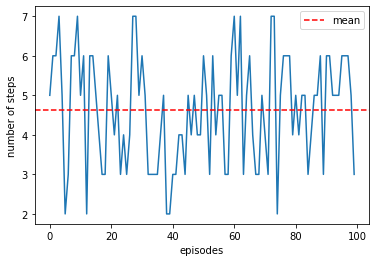

In [28]:
#plt.plot(np.mean(np.array(Tsteps).reshape(-1,10),axis=1))
plt.plot(Tsteps)
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.average(Tsteps),c='red',ls='--',label='mean')
plt.legend()

We plot the rewards and its average.

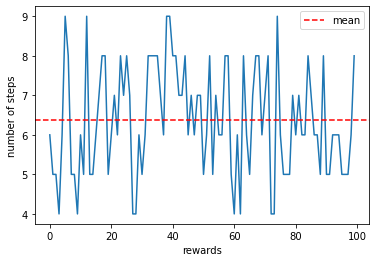

In [29]:
#plt.plot(np.mean(np.array(Trewards).reshape(-1,10),axis=1))
plt.plot(Trewards)
plt.xlabel('rewards')
plt.ylabel('number of steps')
plt.axhline(np.average(Trewards),c='red',ls='--',label='mean')
plt.legend()

Text(0, 0.5, 'Q-value')

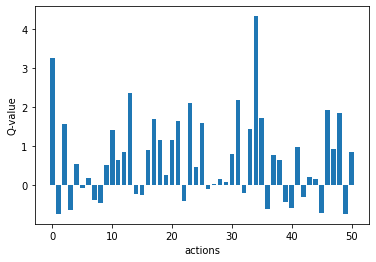

In [66]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[()])
plt.xlabel('actions')
plt.ylabel('Q-value')

Text(0, 0.5, 'Q-value')

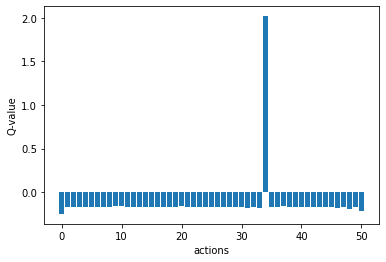

In [51]:
plt.bar(np.arange(len(agt.Q[(-1,)])), agt.Q[(-1,)])
plt.xlabel('actions')
plt.ylabel('Q-value')

Text(0, 0.5, 'Q-value')

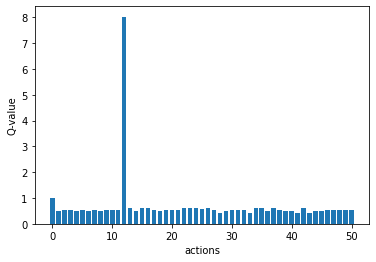

In [52]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(1,)])
plt.xlabel('actions')
plt.ylabel('Q-value')

Text(0, 0.5, 'Q-value')

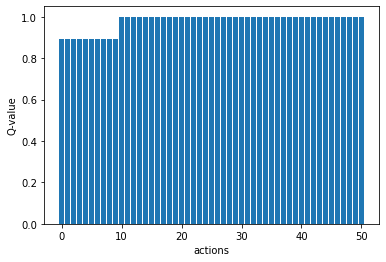

In [58]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(-12, 1)])
plt.xlabel('actions')
plt.ylabel('Q-value')

Text(0, 0.5, 'Q-value')

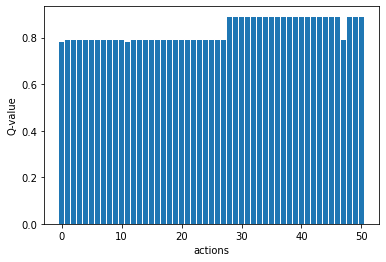

In [59]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(-12, -1)])
plt.xlabel('actions')
plt.ylabel('Q-value')

Text(0, 0.5, 'Q-value')

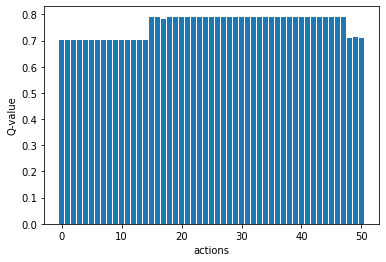

In [60]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(-18, -1)])
plt.xlabel('actions')
plt.ylabel('Q-value')

Text(0, 0.5, 'Q-value')

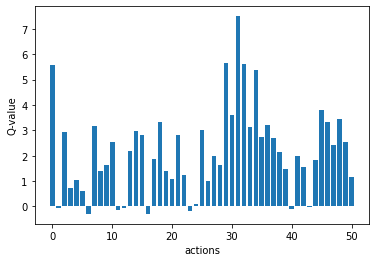

In [65]:
plt.bar(np.arange(len(agt.Q[(1,)])), agt.Q[(-35, -1)])
plt.xlabel('actions')
plt.ylabel('Q-value')